In [1]:
import pandas as pd
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import RobustScaler #Scaling the features
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA



In [2]:
# Load dataset
df = pd.read_csv("creditcard.csv")

In [3]:
# Visualization of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Getting the shape of the data
df.shape

(284807, 31)

In [5]:
# To check if there is any null values present in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Loading the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [8]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [9]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [10]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [11]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [12]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
df['Std_Amount'] = Rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour,Std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0.670579


In [13]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  

In [14]:
X_over= np.array(X_over)
X_test = np.array(X_test)
y_over = np.array(y_over)
y_test = np.array(y_test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#Neural Network build Model with one hidden layer

In [16]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_over.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
Model1.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

#Fit Model
history1= Model1.fit(X_over, y_over, validation_data=(X_test,y_test), batch_size=700, epochs=30, shuffle=True, verbose=1)
print(history1.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                2015      
                                                                 
 dense_1 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
488/488 [==============================] - 2s 2ms/step - loss: 0.2550 - accuracy: 0.9585 - val_loss: 0.0248 - val_accuracy: 0.9929
Epoch 2/30
488/488 [==============================] - 1s 1ms/step - loss: 0.0617 - accuracy: 0.9844 - val_loss: 0.0251 - val_accuracy: 0.9925
Epoch 3/30
488/488 [==============================] - 1s 2ms/step - loss: 0.0567 - accuracy: 0.9869 - val_loss: 0.0198 - val_accuracy: 0.9955
Epoch 4/30
488/488 [==============================] - 1s 1ms/step - loss: 0.0566 - accuracy: 0.9889 - val_loss: 0.0358 - val_accuracy: 0.9910
Epoch 5/30
488/488 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9904 - val_loss: 0.0506 - val_accuracy: 0.9877
Epoch 6/30
488/488 [==============================] - 1s 1ms/step - loss: 0.0178 - accuracy: 0.9953 - val_loss: 0.0304 - val_accuracy: 0.9922
Epoch 7/30
488/488 [==============================] - 1s 1ms/step - loss: 0.0182 - accuracy: 0.9954 - val_loss: 0.0290 - val_accuracy: 0.9930
Epoch 

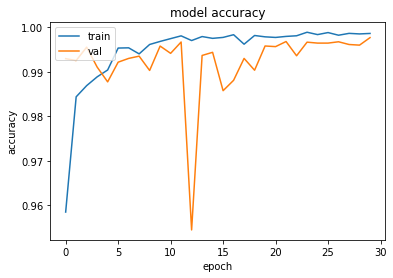

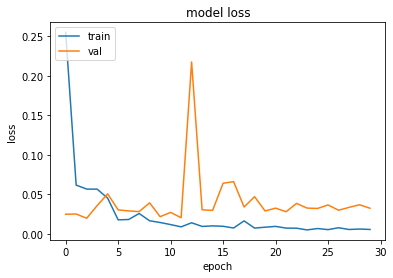

In [17]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
over_predict_Value = Model1.predict(X_test, batch_size=200, verbose=0)

In [19]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
Overfraud = []
for fraud_score in over_predict_Value:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    Overfraud.append(1)
  else:
    Overfraud.append(0)


In [ ]:
#function for confusion matrix
def conf_matrix(y_test,predicted_values):
    Predictions_CM = confusion_matrix(y_test, predicted_values, labels = [0, 1])
    class_feat=df['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [20]:
def Plot_confusion_matrix(y_test, predicted_test):
  cm = confusion_matrix(y_test, predicted_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.22      0.76      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.88      0.67     56961
weighted avg       1.00      1.00      1.00     56961



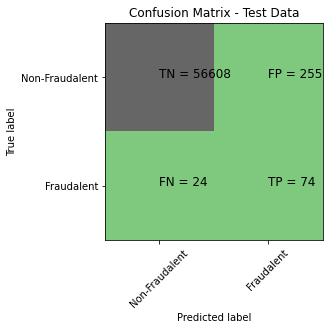

1781/1781 [==============================] - 1s 813us/step - loss: 0.0324 - accuracy: 0.9977
Accuracy NEURAL NETWORK: 0.9976650476455688


In [25]:
#create Ensemble model and fit the model with train dataset
Y_pred_cls = Model1.predict(X_test, batch_size=200, verbose=0)
print("classification Report")
print(classification_report(y_test, Overfraud))
Plot_confusion_matrix(y_test,Overfraud)
print('Accuracy NEURAL NETWORK: '+ str(Model1.evaluate(X_test,y_test)[1]))

In [26]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_over.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

Result1= Model1_drop.fit(X_over, y_over, validation_data=(X_test, y_test), batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=2)
print(Result1.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65)                2015      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


488/488 - 2s - loss: 4.6713 - accuracy: 0.8429 - val_loss: 0.0120 - val_accuracy: 0.9972 - 2s/epoch - 4ms/step
Epoch 2/50
488/488 - 1s - loss: 0.2453 - accuracy: 0.9458 - val_loss: 0.0186 - val_accuracy: 0.9980 - 1s/epoch - 3ms/step
Epoch 3/50
488/488 - 1s - loss: 0.1273 - accuracy: 0.9593 - val_loss: 0.0168 - val_accuracy: 0.9981 - 848ms/epoch - 2ms/step
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


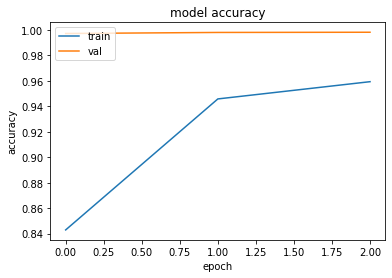

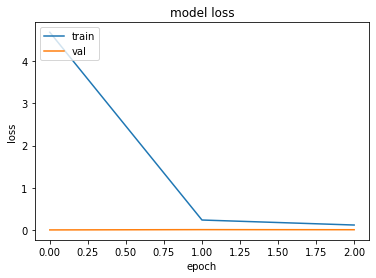

In [27]:
# summarize history for accuracy
plt.plot(Result1.history['accuracy'])
plt.plot(Result1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Result1.history['loss'])
plt.plot(Result1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
over_predict_Value_Dropout = Model1_drop.predict(X_test, batch_size=200, verbose=0)

In [29]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
Overfrauddeopout= []
for fraud_score in over_predict_Value_Dropout:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    Overfrauddeopout.append(1)
  else:
    Overfrauddeopout.append(0)


classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961



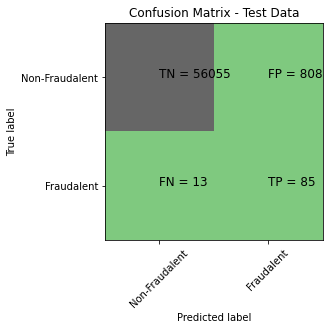

1781/1781 [==============================] - 1s 789us/step - loss: 0.0324 - accuracy: 0.9977
Accuracy NEURAL NETWORK: 0.9976650476455688


In [31]:

#create Ensemble model and fit the model with train dataset
Y_pred_cls = Model1_drop.predict(X_test, batch_size=200, verbose=0)
print("classification Report")
print(classification_report(y_test, Overfrauddeopout))
Plot_confusion_matrix(y_test,Overfrauddeopout)
print('Accuracy NEURAL NETWORK: '+ str(Model1.evaluate(X_test,y_test)[1]))

In [ ]:
#Neural networks with ADASYN Model

In [32]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)


In [33]:
X_train_ADASYN= np.array(X_train_ADASYN)
X_test = np.array(X_test)
y_train_ADASYN = np.array(y_train_ADASYN)
y_test = np.array(y_test)

In [34]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_train_ADASYN.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model2 = Sequential()
Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
Model2.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model2.summary()

#Fit Model
history2= Model1.fit(X_train_ADASYN, y_train_ADASYN, validation_data=(X_test,y_test), batch_size=700, epochs=30, shuffle=True, verbose=1)
print(history2.history.keys())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 65)                2015      
                                                                 
 dense_5 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
 38/650 [>.............................] - ETA: 0s - loss: 0.0197 - accuracy: 0.9953

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


650/650 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0437 - val_accuracy: 0.9954
Epoch 2/30
650/650 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 0.0345 - val_accuracy: 0.9979
Epoch 3/30
650/650 [==============================] - 1s 1ms/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.0324 - val_accuracy: 0.9981
Epoch 4/30
650/650 [==============================] - 1s 1ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0376 - val_accuracy: 0.9971
Epoch 5/30
650/650 [==============================] - 1s 1ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.0425 - val_accuracy: 0.9960
Epoch 6/30
650/650 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.0392 - val_accuracy: 0.9977
Epoch 7/30
650/650 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0444 - val_accuracy: 0.9962
Epoch 8/30
650/65

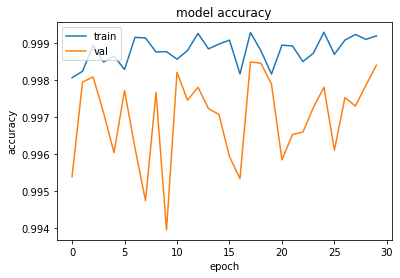

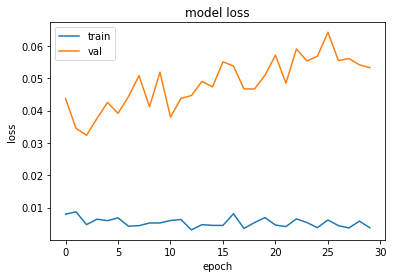

In [35]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
ADSYN_predict_Value = Model2.predict(X_test, batch_size=200, verbose=0)

In [37]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
ADSYNfraud = []
for fraud_score in ADSYN_predict_Value:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    ADSYNfraud.append(1)
  else:
    ADSYNfraud.append(0)
 

classification Report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56863
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56961
   macro avg       0.00      0.50      0.00     56961
weighted avg       0.00      0.00      0.00     56961



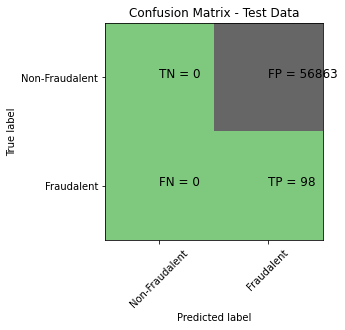

1781/1781 [==============================] - 2s 868us/step - loss: 7.5250 - accuracy: 0.0391
Accuracy NEURAL NETWORK: 0.03914959356188774


In [39]:
#create Ensemble model and fit the model with train dataset
Y_pred_cls = Model2.predict(X_test, batch_size=200, verbose=0)
print("classification Report")
print(classification_report(y_test, ADSYNfraud))
Plot_confusion_matrix(y_test,ADSYNfraud)
print('Accuracy NEURAL NETWORK: '+ str(Model2.evaluate(X_test,y_test)[1]))

In [40]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_train_ADASYN.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model2_drop = Sequential()
Model2_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2_drop.add(Dropout(0.5))
Model2_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model2_drop.summary()

Result2= Model2_drop.fit(X_train_ADASYN, y_train_ADASYN, validation_data=(X_test, y_test), batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=2)
print(Result2.history.keys())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 65)                2015      
                                                                 
 dropout_1 (Dropout)         (None, 65)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


650/650 - 2s - loss: 2.3666 - accuracy: 0.8257 - val_loss: 0.0557 - val_accuracy: 0.9880 - 2s/epoch - 4ms/step
Epoch 2/50
650/650 - 2s - loss: 0.1576 - accuracy: 0.9407 - val_loss: 0.0426 - val_accuracy: 0.9869 - 2s/epoch - 3ms/step
Epoch 3/50
650/650 - 1s - loss: 0.1218 - accuracy: 0.9554 - val_loss: 0.0375 - val_accuracy: 0.9868 - 1s/epoch - 2ms/step
Epoch 4/50
650/650 - 1s - loss: 0.1026 - accuracy: 0.9637 - val_loss: 0.0262 - val_accuracy: 0.9900 - 1s/epoch - 2ms/step
Epoch 5/50
650/650 - 1s - loss: 0.0851 - accuracy: 0.9716 - val_loss: 0.0213 - val_accuracy: 0.9922 - 1s/epoch - 2ms/step
Epoch 6/50
650/650 - 1s - loss: 0.0712 - accuracy: 0.9777 - val_loss: 0.0179 - val_accuracy: 0.9941 - 1s/epoch - 2ms/step
Epoch 7/50
650/650 - 1s - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.0207 - val_accuracy: 0.9925 - 1s/epoch - 2ms/step
Epoch 8/50
650/650 - 1s - loss: 0.0554 - accuracy: 0.9834 - val_loss: 0.0182 - val_accuracy: 0.9938 - 1s/epoch - 2ms/step
dict_keys(['loss', 'accuracy', 'val

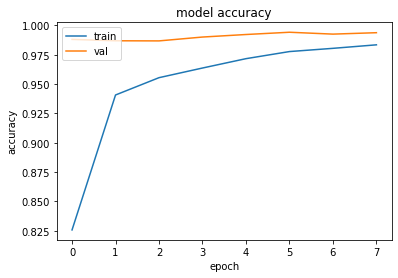

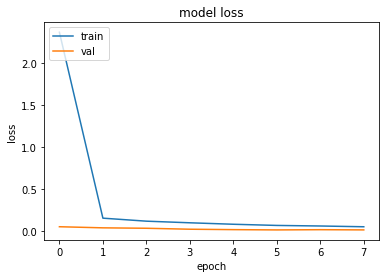

In [41]:
# summarize history for accuracy
plt.plot(Result2.history['accuracy'])
plt.plot(Result2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Result2.history['loss'])
plt.plot(Result2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
ADSYN_predict_Value_dropout = Model2_drop.predict(X_test, batch_size=200, verbose=0)

In [43]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
ADSYNfrauddropout = []
for fraud_score in ADSYN_predict_Value_dropout:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    ADSYNfrauddropout.append(1)
  else:
    ADSYNfrauddropout.append(0)
 

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.05      0.89      0.10        98

    accuracy                           0.97     56961
   macro avg       0.53      0.93      0.54     56961
weighted avg       1.00      0.97      0.98     56961



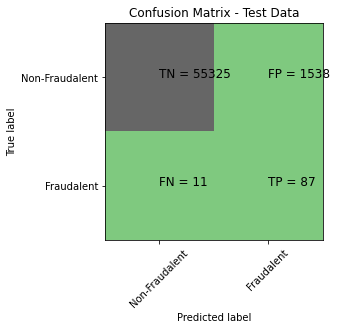

1781/1781 [==============================] - 2s 933us/step - loss: 0.0179 - accuracy: 0.9941
Accuracy NEURAL NETWORK: 0.9941363334655762


In [44]:
#create deep model and fit the model with train dataset
Y_pred_cls = Model2_drop.predict(X_test, batch_size=200, verbose=0)
print("classification Report")
print(classification_report(y_test, ADSYNfrauddropout))
Plot_confusion_matrix(y_test,ADSYNfrauddropout)
print('Accuracy NEURAL NETWORK: '+ str(Model2_drop.evaluate(X_test,y_test)[1]))

In [45]:
#Neural Network with SMOTE
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

In [46]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_train_Smote.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model3 = Sequential()
Model3.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model3.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model

Model3.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model3.summary()

#Fit Model
history3=Model3.fit(X_train_Smote, y_train_Smote, validation_data=(X_train_Smote,y_train_Smote), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history3.history.keys())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 65)                2015      
                                                                 
 dense_9 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


650/650 - 2s - loss: 0.2497 - accuracy: 0.9664 - val_loss: 0.0422 - val_accuracy: 0.9885 - 2s/epoch - 3ms/step
Epoch 2/30
650/650 - 1s - loss: 0.0384 - accuracy: 0.9910 - val_loss: 0.0197 - val_accuracy: 0.9948 - 1s/epoch - 2ms/step
Epoch 3/30
650/650 - 1s - loss: 0.0268 - accuracy: 0.9939 - val_loss: 0.0143 - val_accuracy: 0.9960 - 1s/epoch - 2ms/step
Epoch 4/30
650/650 - 1s - loss: 0.0350 - accuracy: 0.9938 - val_loss: 0.0183 - val_accuracy: 0.9950 - 1s/epoch - 2ms/step
Epoch 5/30
650/650 - 1s - loss: 0.0139 - accuracy: 0.9967 - val_loss: 0.0125 - val_accuracy: 0.9967 - 1s/epoch - 2ms/step
Epoch 6/30
650/650 - 1s - loss: 0.0151 - accuracy: 0.9965 - val_loss: 0.0078 - val_accuracy: 0.9985 - 1s/epoch - 2ms/step
Epoch 7/30
650/650 - 1s - loss: 0.0151 - accuracy: 0.9966 - val_loss: 0.0101 - val_accuracy: 0.9974 - 1s/epoch - 2ms/step
Epoch 8/30
650/650 - 2s - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.0108 - val_accuracy: 0.9982 - 2s/epoch - 2ms/step
dict_keys(['loss', 'accuracy', 'val

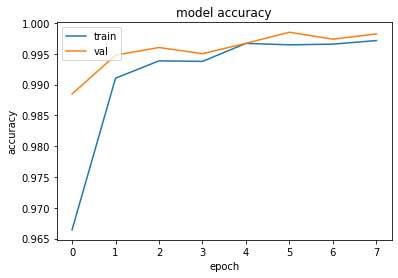

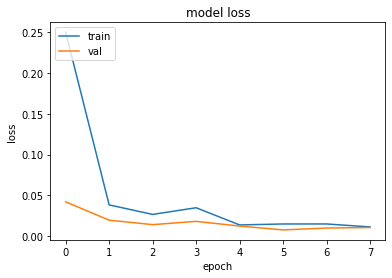

In [47]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
SMOTE_predict_Value = Model3.predict(X_test, batch_size=200, verbose=0)

In [49]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
SMOTEfraud = []
for fraud_score in SMOTE_predict_Value:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    SMOTEfraud.append(1)
  else:
    SMOTEfraud.append(0)

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.12      0.74      0.21        98

    accuracy                           0.99     56961
   macro avg       0.56      0.87      0.60     56961
weighted avg       1.00      0.99      0.99     56961



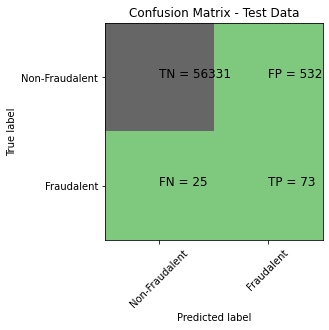

1781/1781 [==============================] - 2s 905us/step - loss: 0.0215 - accuracy: 0.9967
Accuracy NEURAL NETWORK: 0.996734619140625


In [50]:
#create deep model and fit the model with train dataset
Y_pred_cls = Model3.predict(X_test, batch_size=200, verbose=0)
print("classification Report")
print(classification_report(y_test, SMOTEfraud))
Plot_confusion_matrix(y_test,SMOTEfraud)
print('Accuracy NEURAL NETWORK: '+ str(Model3.evaluate(X_test,y_test)[1]))

In [51]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_train_Smote.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model3_drop = Sequential()
Model3_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model3_drop.add(Dropout(0.5))
Model3_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model3_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model3_drop.summary()

Result3= Model3_drop.fit(X_train_Smote, y_train_Smote, validation_data=(X_test, y_test), batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=2)
print(Result3.history.keys())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 65)                2015      
                                                                 
 dropout_2 (Dropout)         (None, 65)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


650/650 - 2s - loss: 3.0027 - accuracy: 0.8503 - val_loss: 0.0299 - val_accuracy: 0.9947 - 2s/epoch - 3ms/step
Epoch 2/50
650/650 - 1s - loss: 0.1363 - accuracy: 0.9565 - val_loss: 0.0235 - val_accuracy: 0.9968 - 1s/epoch - 2ms/step
Epoch 3/50
650/650 - 1s - loss: 0.0976 - accuracy: 0.9668 - val_loss: 0.0229 - val_accuracy: 0.9958 - 1s/epoch - 2ms/step
Epoch 4/50
650/650 - 1s - loss: 0.0821 - accuracy: 0.9714 - val_loss: 0.0257 - val_accuracy: 0.9936 - 1s/epoch - 2ms/step
Epoch 5/50
650/650 - 1s - loss: 0.0727 - accuracy: 0.9745 - val_loss: 0.0225 - val_accuracy: 0.9943 - 1s/epoch - 2ms/step
Epoch 6/50
650/650 - 1s - loss: 0.0650 - accuracy: 0.9769 - val_loss: 0.0197 - val_accuracy: 0.9946 - 1s/epoch - 2ms/step
Epoch 7/50
650/650 - 1s - loss: 0.0581 - accuracy: 0.9795 - val_loss: 0.0243 - val_accuracy: 0.9926 - 1s/epoch - 2ms/step
Epoch 8/50
650/650 - 1s - loss: 0.0549 - accuracy: 0.9809 - val_loss: 0.0137 - val_accuracy: 0.9963 - 1s/epoch - 2ms/step
Epoch 9/50
650/650 - 1s - loss: 0.0

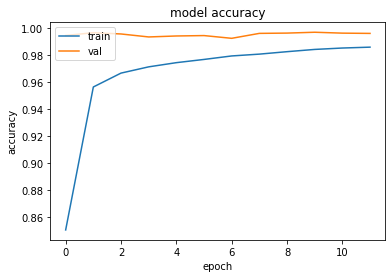

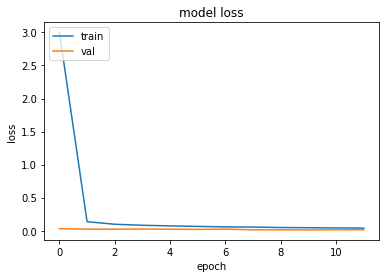

In [52]:
# summarize history for accuracy
plt.plot(Result3.history['accuracy'])
plt.plot(Result3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Result3.history['loss'])
plt.plot(Result3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
Smote_predict_Value_dropout = Model3_drop.predict(X_test, batch_size=200, verbose=0)

In [54]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
Smotefrauddropout = []
for fraud_score in Smote_predict_Value_dropout:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    Smotefrauddropout.append(1)
  else:
    Smotefrauddropout.append(0)
 

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.09      0.87      0.17        98

    accuracy                           0.98     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.98      0.99     56961



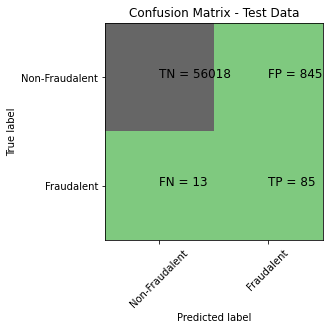

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0119 - accuracy: 0.9971
Accuracy NEURAL NETWORK: 0.9971208572387695


In [56]:
#create deep model and fit the model with train dataset
Y_pred_cls = Model3_drop.predict(X_test, batch_size=200, verbose=0)
print("classification Report")
print(classification_report(y_test, Smotefrauddropout))
Plot_confusion_matrix(y_test,Smotefrauddropout)
print('Accuracy NEURAL NETWORK: '+ str(Model3_drop.evaluate(X_test,y_test)[1]))